<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>

* Name: <a href="https://www.gernotheisenberg.de/">Rubaiya Kabir Pranti</a>
* Matriculation Number: <a href="https://www.gernotheisenberg.de/"> 11146364</a>
* Date:   16.01.2024

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

<u><font size="4"> **Datasets Used:**</u></font> <br>

<font size="4"><u>**Normally Distributed:**</u></font>

- **<span style="background-color:white">[Graduate Admissions](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)</span>**
- **<span style="background-color:white">[Boston Housing Dataset](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)</span>**

<font size="4"><u> **Not Normally Distributed:**</u></font>

- **<span style="background-color:white">[Climate Dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)</span>**

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

## 1. Admission Prediction Dataset

In [2]:
# loading csv dataset
df1 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/Admission_Predict.csv')

# only CGPA column is normally distributed
data1 = df1['CGPA'].values

data_reshaped1=data1.reshape(-1,1) 

## Elbow method to determine eps (neighbourhood radius)

In [3]:
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# number of neighbors, I want to consider for the analysis
neighbors = 10

# fitting a Nearest Neighbors model to reshaped data
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(data_reshaped1)

# calculating the distances to the neighbors
distances, _ = nbrs.kneighbors(data_reshaped1)

# calculating the distances to the k-nearest neighbor for each data point
average_distances = sorted(distances[:, neighbors - 1], reverse=True)

# creating a KneeLocator instance to find the knee point
# range(1, len(average_distances) + 1): the x-values, which represent the number of neighbors (k)
# S=1.0: sensitivity parameter that controls the detection of the knee point
kneedle = KneeLocator(range(1, len(average_distances) + 1), average_distances, S=1.0, curve="convex", direction="decreasing")

# the knee point
# kneedle.plot_knee_normalized()

### epsilon value from knee point method

In [4]:
kneedle.knee_y #epsilon value

0.10000000000000142

In [5]:
kneedle.elbow # number of neighbours 

11

### epsilon value from elbow graph method

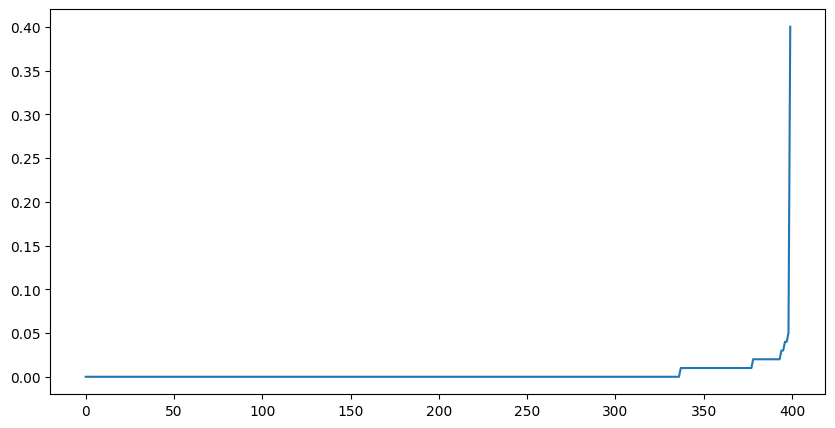

In [6]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(data_reshaped1)
distances, idx = nn.kneighbors(data_reshaped1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [7]:
from sklearn import metrics

db = DBSCAN(eps=0.2, min_samples=6).fit(data_reshaped1)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_reshaped1, labels))

Estimated number of clusters: 1
Estimated number of noise points: 1
Silhouette Coefficient: 0.565


## Determinin optimal minPts using Silhouette Score

In [8]:
# range of MinPts values 
minPts_values = range(2, 41)
best_silhouette_score = None  
best_minPts = None

for minPts in minPts_values:
    # fit DBSCAN model with the current MinPts value
    dbscan = DBSCAN(eps=0.1, min_samples=minPts)
    cluster_labels = dbscan.fit_predict(data_reshaped1)
    
    # the silhouette score for the current clustering
    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) > 1:  # Ensure more than one cluster is formed
        silhouette_avg = silhouette_score(data_reshaped1, cluster_labels)
        print(f"MinPts={minPts}, Silhouette Score={silhouette_avg:.4f}")
        
        # confirming if the current MinPts value produces a higher silhouette score
        if best_silhouette_score is None or silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_minPts = minPts
    else:
        print(f"MinPts={minPts}, Silhouette Score: Not enough clusters formed")

if best_minPts is not None:
    print(f"Best MinPts: {best_minPts}, Best Silhouette Score: {best_silhouette_score:.4f}")
else:
    print("No meaningful clusters found for any MinPts value.")

MinPts=2, Silhouette Score=0.5649
MinPts=3, Silhouette Score=0.5649
MinPts=4, Silhouette Score=0.5649
MinPts=5, Silhouette Score=0.5649
MinPts=6, Silhouette Score=0.5649
MinPts=7, Silhouette Score=0.5649
MinPts=8, Silhouette Score=0.5104
MinPts=9, Silhouette Score=0.5104
MinPts=10, Silhouette Score=0.4860
MinPts=11, Silhouette Score=0.4860
MinPts=12, Silhouette Score=0.4762
MinPts=13, Silhouette Score=0.4837
MinPts=14, Silhouette Score=0.4837
MinPts=15, Silhouette Score=0.4837
MinPts=16, Silhouette Score=0.2568
MinPts=17, Silhouette Score=0.4704
MinPts=18, Silhouette Score=0.4539
MinPts=19, Silhouette Score=0.4521
MinPts=20, Silhouette Score=0.4521
MinPts=21, Silhouette Score=0.4470
MinPts=22, Silhouette Score=0.4470
MinPts=23, Silhouette Score=0.4470
MinPts=24, Silhouette Score=0.4470
MinPts=25, Silhouette Score=0.4470
MinPts=26, Silhouette Score=0.4390
MinPts=27, Silhouette Score=0.4184
MinPts=28, Silhouette Score=0.4137
MinPts=29, Silhouette Score=0.4137
MinPts=30, Silhouette Score=

In [9]:
# hyperparameters
minPts = 2 # minPts >= D+1, for 2D data, minPts=4
eps = 0.1 #manually

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_reshaped1)

list(clusters).count(-1)

1

# Comments
MinPts values of 2 with the highest Silhouette Scores indicating -  the most optimal clustering quality for my dataset according to this metric.

By taking minPts = 2  and eps = 0.1 from results, outlier is detected as 1 now. The choice of minPts and eps significantly impacts the anomaly det. result. A smaller eps can give more outliers and larger eps can miss significant anomalies.
The chosen value for minPts is low, which means that even very small groupings of points will be considered clusters. This can also affect the number of points classified as outliers.

## 2. Boston Housing Dataset

In [10]:
# loading csv dataset
df2 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/HousingData.csv')

# only RM column is normally distributed
data2 = df2['RM'].values

data_reshaped2=data2.reshape(-1,1) 

## Elbow method to determine eps (neighbourhood radius)

In [11]:
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# number of neighbors
neighbors = 10

# fitting a Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(data_reshaped2)

# calculating the distances to the neighbors
distances, _ = nbrs.kneighbors(data_reshaped2)

# calculating the distances to the k-nearest neighbor for each data point
average_distances = sorted(distances[:, neighbors - 1], reverse=True)

# creating a KneeLocator instance to find the knee point
kneedle = KneeLocator(range(1, len(average_distances) + 1), average_distances, S=1.0, curve="convex", direction="decreasing")

# the knee point
# kneedle.plot_knee_normalized()

In [12]:
kneedle.knee_y #epsilon

0.16300000000000026

In [13]:
kneedle.elbow #k value

25

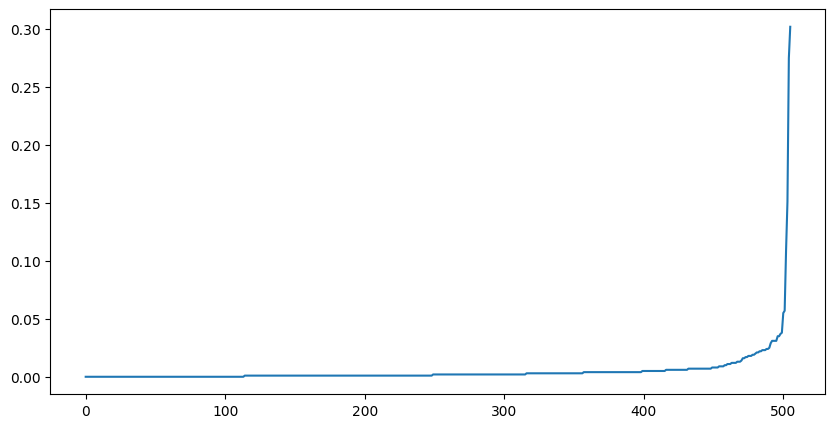

Estimated number of clusters: 1
Estimated number of noise points: 11
Silhouette Coefficient: 0.668


In [14]:
from sklearn import metrics

plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(data_reshaped2)
distances, idx = nn.kneighbors(data_reshaped2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

db = DBSCAN(eps=0.2, min_samples=6).fit(data_reshaped2)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_reshaped2, labels))

## Determinin optimal minPts using Silhouette Score

In [15]:
# range of MinPts values 
minPts_values = range(2, 41)
best_silhouette_score = None  
best_minPts = None

for minPts in minPts_values:
    # fit DBSCAN model with the current MinPts value
    dbscan = DBSCAN(eps=0.163, min_samples=minPts)
    cluster_labels = dbscan.fit_predict(data_reshaped2)
    
    # the silhouette score for the current clustering
    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) > 1:  # Ensure more than one cluster is formed
        silhouette_avg = silhouette_score(data_reshaped2, cluster_labels)
        print(f"MinPts={minPts}, Silhouette Score={silhouette_avg:.4f}")
        
        # confirming if the current MinPts value produces a higher silhouette score
        if best_silhouette_score is None or silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_minPts = minPts
    else:
        print(f"MinPts={minPts}, Silhouette Score: Not enough clusters formed")

if best_minPts is not None:
    print(f"Best MinPts: {best_minPts}, Best Silhouette Score: {best_silhouette_score:.4f}")
else:
    print("No meaningful clusters found for any MinPts value.")

MinPts=2, Silhouette Score=0.4852
MinPts=3, Silhouette Score=0.4853
MinPts=4, Silhouette Score=0.4690
MinPts=5, Silhouette Score=0.5749
MinPts=6, Silhouette Score=0.5749
MinPts=7, Silhouette Score=0.5749
MinPts=8, Silhouette Score=0.6627
MinPts=9, Silhouette Score=0.6627
MinPts=10, Silhouette Score=0.5411
MinPts=11, Silhouette Score=0.5411
MinPts=12, Silhouette Score=0.3756
MinPts=13, Silhouette Score=0.4580
MinPts=14, Silhouette Score=0.4598
MinPts=15, Silhouette Score=0.6072
MinPts=16, Silhouette Score=0.6072
MinPts=17, Silhouette Score=0.6072
MinPts=18, Silhouette Score=0.6072
MinPts=19, Silhouette Score=0.6072
MinPts=20, Silhouette Score=0.6072
MinPts=21, Silhouette Score=0.6059
MinPts=22, Silhouette Score=0.6000
MinPts=23, Silhouette Score=0.5986
MinPts=24, Silhouette Score=0.5961
MinPts=25, Silhouette Score=0.5961
MinPts=26, Silhouette Score=0.5912
MinPts=27, Silhouette Score=0.5899
MinPts=28, Silhouette Score=0.5873
MinPts=29, Silhouette Score=0.5798
MinPts=30, Silhouette Score=

# Comments
MinPts values of 8 with the highest Silhouette Scores indicating -  the most optimal clustering quality for my dataset according to this metric.

In [16]:
# hyperparameters
minPts = 8 # minPts >= D+1
eps = 0.163

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_reshaped2)

list(clusters).count(-1)

18

By taking minPts = 8  and eps = 0.163 from results, outlier is detected now (about 18). The choice of minPts and eps significantly impacts the anomaly det. result. A smaller eps can give more outliers and larger eps can miss significant anomalies.
The chosen value for minPts is quite high, which means that even medium groupings of points will be considered clusters. This can also affect the number of points classified as outliers.

## 3. Climate Dataset

In [17]:
# loading csv dataset
df3 = pd.read_csv('C:/Users/rubai/AML/my_datasets/not_normal/DailyDelhiClimateTrain.csv')
# only wind column is normally distributed
data3 = df3['wind_speed'].values

In [18]:
data_reshaped3=data3.reshape(-1,1) 

## Elbow method to determine eps (neighbourhood radius)

In [19]:
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# number of neighbors
neighbors = 10

# fitting a Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(data_reshaped3)

# calculating the distances to the neighbors
distances, _ = nbrs.kneighbors(data_reshaped3)

# calculating the distances to the k-nearest neighbor for each data point
average_distances = sorted(distances[:, neighbors - 1], reverse=True)

# creating a KneeLocator instance to find the knee point
kneedle = KneeLocator(range(1, len(average_distances) + 1), average_distances, S=1.0, curve="convex", direction="decreasing")

# the knee point
# kneedle.plot_knee_normalized()

In [20]:
kneedle.knee_y #epsilon

0.5500000000000043

In [21]:
kneedle.elbow # k value

26

## Determinin optimal minPts using Silhouette Score

In [22]:
# range of MinPts values 
minPts_values = range(2, 41)
best_silhouette_score = None  
best_minPts = None

for minPts in minPts_values:
    # fit DBSCAN model with the current MinPts value
    dbscan = DBSCAN(eps=0.5, min_samples=minPts)
    cluster_labels = dbscan.fit_predict(data_reshaped2)
    
    # the silhouette score for the current clustering
    unique_labels = np.unique(cluster_labels)
    if len(unique_labels) > 1:  # Ensure more than one cluster is formed
        silhouette_avg = silhouette_score(data_reshaped2, cluster_labels)
        print(f"MinPts={minPts}, Silhouette Score={silhouette_avg:.4f}")
        
        # confirming if the current MinPts value produces a higher silhouette score
        if best_silhouette_score is None or silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_minPts = minPts
    else:
        print(f"MinPts={minPts}, Silhouette Score: Not enough clusters formed")

if best_minPts is not None:
    print(f"Best MinPts: {best_minPts}, Best Silhouette Score: {best_silhouette_score:.4f}")
else:
    print("No meaningful clusters found for any MinPts value.")

MinPts=2, Silhouette Score: Not enough clusters formed
MinPts=3, Silhouette Score: Not enough clusters formed
MinPts=4, Silhouette Score: Not enough clusters formed
MinPts=5, Silhouette Score=0.7072
MinPts=6, Silhouette Score=0.7072
MinPts=7, Silhouette Score=0.6950
MinPts=8, Silhouette Score=0.6950
MinPts=9, Silhouette Score=0.6950
MinPts=10, Silhouette Score=0.6950
MinPts=11, Silhouette Score=0.6950
MinPts=12, Silhouette Score=0.6950
MinPts=13, Silhouette Score=0.6950
MinPts=14, Silhouette Score=0.6950
MinPts=15, Silhouette Score=0.6950
MinPts=16, Silhouette Score=0.6950
MinPts=17, Silhouette Score=0.6950
MinPts=18, Silhouette Score=0.6950
MinPts=19, Silhouette Score=0.6640
MinPts=20, Silhouette Score=0.6640
MinPts=21, Silhouette Score=0.6640
MinPts=22, Silhouette Score=0.6894
MinPts=23, Silhouette Score=0.6894
MinPts=24, Silhouette Score=0.6894
MinPts=25, Silhouette Score=0.6894
MinPts=26, Silhouette Score=0.6894
MinPts=27, Silhouette Score=0.6894
MinPts=28, Silhouette Score=0.6860


# Comments
MinPts values of 5 and 6 with the highest Silhouette Scores indicating -  the most optimal clustering quality for my dataset according to this metric.

In [23]:
# hyperparameters
minPts = 5 # minPts >= D+1
eps = 0.55

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(data_reshaped2)

list(clusters).count(-1)

0

By taking minPts = 5  and eps = 0.55 from results, outlier is not detected now, the parametrs should be tuned more. The choice of minPts and eps significantly impacts the anomaly det. result. A smaller eps can give more outliers and larger eps can miss significant anomalies.
The chosen value for minPts is low, which means that even very small groupings of points will be considered clusters. This can also affect the number of points classified as outliers.

Notes:
links: https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31
Core Points: Core data points have at least minPts number of data points within their epsilon distance.

Border Points: Border data points are on the outskirts as they are in the neighborhood (ie. w/in epsilon distance of core point) but have less than the required minPts.

Outlier Points: These points are not part of a neighborhood (ie. more than epsilon distance) and are not border points. These are points located in low-density areas.

Silhouette Method: This technique measures the separability between clusters. First, an average distance is found between each point and all other points in a cluster. Then it measures the distance between each point and each point in other clusters. We subtract the two average measures and divide by whichever average is larger.